# Нейронные сети

Построить нейросетевой классификатор для набора данных [MNIST](https://www.kaggle.com/c/digit-recognizer).

## Задание

1. Построть двуслойную нейронную сеть.
2. Построить отчет по классификации  [classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) и матрицу ошибок [confusion_matrix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)
3. Добавить скрытые слои и оценить как изменится качество классификации.

In [ ]:
random_point = 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

C:\Users\TEMP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\TEMP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\TEMP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\TEMP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [3]:
df = pd.read_csv("train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = pd.DataFrame(df['label'])
X = pd.DataFrame(df.drop(['label'], axis=1))

# Визуализация данных

In [5]:
X = X / 255
X = X.values.reshape(-1, 28, 28, 1)
Y = to_categorical(Y, num_classes = 10)
print(X[8][:,:,0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

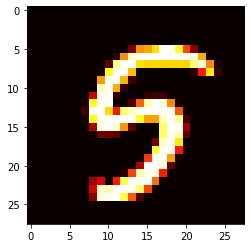

In [15]:
plt.imshow(X[8][:, :, 0], cmap='hot')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = random_point)

# Двуслойная нейронная сеть

In [51]:
model_s = Sequential()

#Input layer
model_s.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model_s.add(BatchNormalization())

model_s.add(MaxPool2D(pool_size=(2,2)))
model_s.add(Dropout(0.25))

#OutputLayer
model_s.add(Flatten())
model_s.add(Dense(10, activation = "softmax"))# Выбираем, какая цифра из десяти на картинке с наибольшей вероятностью
model_s.save("Digit_rec_model_simple.hdf5", include_optimizer = False)

In [52]:
weights_file = "simple_weights.hdf5"
checkpoint = ModelCheckpoint(weights_file, monitor='val_accuracy', mode='min', save_best_only=True, verbose=1)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_s.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 5
batch_size = 32
datagen = ImageDataGenerator()
datagen.fit(X_train)
history = model_s.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size), 
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks = [learning_rate_reduction, checkpoint] )


Epoch 1/5
 - 107s - loss: 0.1634 - accuracy: 0.9544 - val_loss: 0.0949 - val_accuracy: 0.9687

Epoch 00001: val_accuracy improved from inf to 0.96873, saving model to simple_weights.hdf5


C:\Users\TEMP\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/5
 - 103s - loss: 0.0675 - accuracy: 0.9811 - val_loss: 0.0766 - val_accuracy: 0.9784

Epoch 00002: val_accuracy did not improve from 0.96873
Epoch 3/5
 - 116s - loss: 0.0549 - accuracy: 0.9847 - val_loss: 0.0732 - val_accuracy: 0.9803

Epoch 00003: val_accuracy did not improve from 0.96873
Epoch 4/5
 - 120s - loss: 0.0484 - accuracy: 0.9869 - val_loss: 0.0839 - val_accuracy: 0.9810

Epoch 00004: val_accuracy did not improve from 0.96873
Epoch 5/5
 - 117s - loss: 0.0434 - accuracy: 0.9878 - val_loss: 0.0913 - val_accuracy: 0.9807

Epoch 00005: val_accuracy did not improve from 0.96873


In [54]:
predicted = model_s.predict(X_test)
predicted = np.argmax(predicted, axis = 1) 
y_test = np.argmax(Y_test, axis = 1) 
predicted

array([8, 7, 6, ..., 3, 4, 0], dtype=int64)

### Отчет о классификации двуслойной сети

In [56]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1273
           1       0.98      0.99      0.99      1401
           2       0.98      0.97      0.97      1210
           3       1.00      0.95      0.97      1283
           4       0.98      0.98      0.98      1189
           5       0.97      0.99      0.98      1201
           6       0.99      0.99      0.99      1245
           7       0.98      0.99      0.98      1339
           8       0.98      0.97      0.98      1201
           9       0.97      0.98      0.98      1258

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



### Матрица ошибок двуслойной сети

In [62]:
print(confusion_matrix(y_test, predicted))

[[1270    0    0    0    1    0    1    0    1    0]
 [   0 1393    2    0    2    0    2    2    0    0]
 [  11    8 1171    1    4    0    1    5    4    5]
 [   2    5   12 1218    1   23    0    8    7    7]
 [   2    4    0    0 1166    0    3    1    2   11]
 [   3    0    2    0    0 1189    4    0    2    1]
 [   4    0    0    0    2    6 1231    0    2    0]
 [   2    5    8    1    3    0    0 1320    0    0]
 [   4    6    1    2    3    6    2    2 1167    8]
 [   3    1    1    0    8    4    0    7    2 1232]]


# Усложненная модель

In [9]:
model = Sequential()

#Input layer
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())

#First layer
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Second layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

#OutputLayer
model.add(Flatten())
model.add(Dense(10, activation = "softmax")) # Выбираем, какая цифра из десяти на картинке с наибольшей вероятностью

In [10]:
weights_file = "weights.hdf5"
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 5
batch_size = 32
datagen = ImageDataGenerator()
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size), 
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks = [learning_rate_reduction] )


Epoch 1/5
 - 404s - loss: 0.2560 - accuracy: 0.9472 - val_loss: 0.1223 - val_accuracy: 0.9729
Epoch 2/5


C:\Users\TEMP\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 397s - loss: 0.0907 - accuracy: 0.9801 - val_loss: 0.0716 - val_accuracy: 0.9847
Epoch 3/5
 - 411s - loss: 0.0553 - accuracy: 0.9875 - val_loss: 0.0728 - val_accuracy: 0.9856
Epoch 4/5
 - 412s - loss: 0.0406 - accuracy: 0.9903 - val_loss: 0.0751 - val_accuracy: 0.9860
Epoch 5/5
 - 411s - loss: 0.0313 - accuracy: 0.9929 - val_loss: 0.0754 - val_accuracy: 0.9856


In [11]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis = 1) 
y_test = np.argmax(Y_test, axis = 1)

### Отчет о классификации усложненной модели

In [12]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1233
           1       0.99      0.99      0.99      1509
           2       0.98      0.98      0.98      1268
           3       1.00      0.98      0.99      1330
           4       0.99      0.98      0.99      1180
           5       0.98      0.98      0.98      1109
           6       0.99      0.99      0.99      1243
           7       0.98      0.99      0.98      1313
           8       0.99      0.98      0.98      1189
           9       0.96      0.99      0.98      1226

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



### Матрица ошибок усложненной модели

In [13]:
print(confusion_matrix(y_test, predicted))

[[1224    0    1    0    0    0    2    0    0    6]
 [   0 1501    4    0    1    0    0    3    0    0]
 [   2    4 1247    0    1    0    0   10    0    4]
 [   1    0    8 1300    0   11    0    4    2    4]
 [   1    4    0    0 1157    0    2    1    1   14]
 [   3    0    1    3    1 1090    7    0    3    1]
 [   6    0    0    1    3    2 1230    0    1    0]
 [   0    1    5    0    1    0    0 1298    0    8]
 [   3    2    7    0    2    2    5    0 1160    8]
 [   2    1    0    0    0    4    0    7    0 1212]]


# Вывод
Таким образом, видим, что при усложнении модели (добавлении новых слоев) качество наших предсказаний улучшилось - показатель accuracy, так же как и средние значения других метрик, вырос на 0.01.